In [1]:
import pandas as pd
merged_df = pd.read_csv('Merged_DatasetV2.csv')
merged_df.head()


/var/folders/rf/qbnw5dmn5dq1gms0pls5p4b40000gn/T/ipykernel_9895/647249361.py:2: DtypeWarning: Columns (4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('Merged_DatasetV2.csv')


,Unnamed: 0,id,type,name,city,state,county,country,lifespan_years,status,services_offered
0,0,f9a1fd95-4c6d-43a6-bb31-4ee8d5a44a8b,Studio,Columbia (CBS) Studio ‘B’,Test Restaurant,New York,NaN,US,NaN,Active,NaN
1,1,42e9fa7c-a981-44f9-943c-bf39a8c6ce8d,Venue,New Theatre Oxford,Victoria House Hotel,England,Oxfordshire,GB,NaN,Active,NaN
2,2,34e7351d-715d-4b20-a5d6-3c0bd717eb1d,Religious building,Santuario della Beata Vergine di Ariadello,Genivolta,NaN,NaN,IT,359.0,Active,NaN
3,3,0ad32768-514b-410f-9d5a-40ebb0c3373c,Studio,ROKU-st,Tenso Jinja,NaN,NaN,JP,NaN,Active,NaN
4,4,0b050655-48da-4be7-b5de-7a3ee7370b9e,Venue,Rätschenmühle,Geislingen an der Steige,NaN,NaN,DE,NaN,Active,NaN


In [2]:
# Drop rows where 'services_offered' is null
merged_df = merged_df.dropna(subset=['services_offered'])

# Drop the specified columns
merged_df = merged_df.drop(columns=['Unnamed: 0', 'id', 'name'])

# Display the updated dataframe
merged_df.head()


,type,city,state,county,country,lifespan_years,status,services_offered
15520,Other,Los Jarales,NaN,NaN,VE,NaN,Active,recorded at
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,62.0,Active,recorded at
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,NaN,Active,recorded at
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,NaN,US,5.0,Ended,engineered at
15525,Venue,Shimokitazawa Eki,NaN,NaN,JP,34.0,Active,recorded at


In [3]:
# Split the 'services_offered' column by commas and explode the dataframe
merged_df['services_offered'] = merged_df['services_offered'].str.split(', ')
merged_df = merged_df.explode('services_offered')

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,lifespan_years,status,services_offered
15520,Other,Los Jarales,NaN,NaN,VE,NaN,Active,recorded at
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,62.0,Active,recorded at
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,NaN,Active,recorded at
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,NaN,US,5.0,Ended,engineered at
15525,Venue,Shimokitazawa Eki,NaN,NaN,JP,34.0,Active,recorded at


In [4]:
# Impute "Missing" for null categorical variables
categorical_columns = ['type', 'city', 'state', 'county', 'country']
merged_df[categorical_columns] = merged_df[categorical_columns].fillna('Missing')

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,lifespan_years,status,services_offered
15520,Other,Los Jarales,Missing,Missing,VE,NaN,Active,recorded at
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,62.0,Active,recorded at
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,NaN,Active,recorded at
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,Missing,US,5.0,Ended,engineered at
15525,Venue,Shimokitazawa Eki,Missing,Missing,JP,34.0,Active,recorded at


In [5]:
from sklearn.impute import SimpleImputer

# Create an imputer object with median strategy and add_indicator=True
imputer = SimpleImputer(strategy='median', add_indicator=True)

# Fit and transform the 'lifespan_years' column
lifespan_imputed = imputer.fit_transform(merged_df[['lifespan_years']])

# Create new columns for the imputed values and the indicator
merged_df['lifespan_years'] = lifespan_imputed[:, 0]
merged_df['lifespan_years_missing'] = lifespan_imputed[:, 1]

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,lifespan_years,status,services_offered,lifespan_years_missing
15520,Other,Los Jarales,Missing,Missing,VE,43.0,Active,recorded at,1.0
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,62.0,Active,recorded at,0.0
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,43.0,Active,recorded at,1.0
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,Missing,US,5.0,Ended,engineered at,0.0
15525,Venue,Shimokitazawa Eki,Missing,Missing,JP,34.0,Active,recorded at,0.0


In [6]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
num_scaler = MinMaxScaler()

# Fit and transform the 'lifespan_years' column
merged_df['lifespan_years'] = num_scaler.fit_transform(merged_df[['lifespan_years']])

# Display the updated dataframe
merged_df.head()

,type,city,state,county,country,lifespan_years,status,services_offered,lifespan_years_missing
15520,Other,Los Jarales,Missing,Missing,VE,0.020525,Active,recorded at,1.0
15521,Venue,Plasky,Brussels Capital,Bruxelles-Capitale,BE,0.029594,Active,recorded at,0.0
15522,Other,Dunluce Castle,Northern Ireland,Causeway Coast and Glens,GB,0.020525,Active,recorded at,1.0
15524,Studio,Saint Johns Eastern Orthodox Church,Tennessee,Missing,US,0.002387,Ended,engineered at,0.0
15525,Venue,Shimokitazawa Eki,Missing,Missing,JP,0.016229,Active,recorded at,0.0


In [7]:
# Identify categorical columns (all columns except 'lifespan_years')
categorical_columns = merged_df.select_dtypes(include=['object']).columns.tolist()

# Perform one-hot encoding on the categorical columns
merged_df_encoded = pd.get_dummies(merged_df, columns=categorical_columns)

# Convert boolean values to 0 or 1
merged_df_encoded = merged_df_encoded.astype(int)

# Display the updated dataframe
merged_df_encoded.head()

,lifespan_years,lifespan_years_missing,type_Amphitheatre,type_Club,type_Concert hall / Theatre,type_Educational institution,type_Festival stage,type_Indoor arena,type_Missing,type_Other,...,services_offered_engineered at,services_offered_lyrics written at,services_offered_mixed at,services_offered_premiere,services_offered_produced at,services_offered_recorded at,services_offered_remixed at,services_offered_revised at,services_offered_video shot at,services_offered_written at
15520,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
15521,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
15522,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
15524,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
15525,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/Library/Frameworks/Python.framework/Version

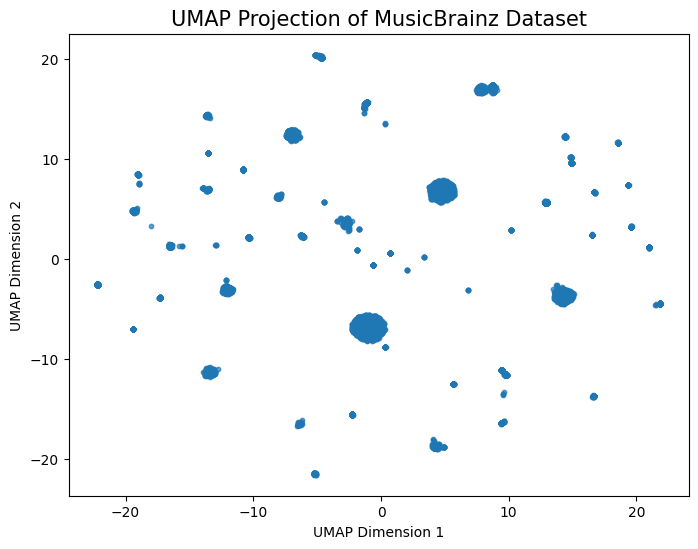

In [8]:
import numpy as np
import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ----------------------------------------------------
# 1. Load or define your pre-processed data
#    (We assume merged_df_encoded is already
#     encoded and has no missing values.)

# If you already have it in memory, just assign:
# merged_df_encoded = ...

# For demonstration, let's assume merged_df_encoded is loaded as follows:
# merged_df_encoded = pd.read_csv('path_to_your_file.csv')

# ----------------------------------------------------
# 2. Separate features from any target/labels (if applicable)
#    If you don't have a target column, just use the entire DataFrame.


# ----------------------------------------------------
# X_umap now holds the 2D embedding of your data
X = merged_df_encoded.values  # Convert DataFrame to a NumPy array

# ----------------------------------------------------
# 3. Optional: Scale data
#    UMAP is sensitive to scale, so standardizing or normalizing is often useful.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------------------------------
# 4. Create and fit the UMAP model
#    Adjust parameters such as n_neighbors, min_dist, etc., as needed.
reducer = umap.UMAP(
    n_neighbors=15,   # typical default, can tune
    n_components=2,   # 2D for visualization
    min_dist=0.1,     # controls how tightly points are clustered
    metric='euclidean',
    random_state=42    # for reproducibility
)

# Perform the dimensionality reduction
X_umap = reducer.fit_transform(X_scaled)

# ----------------------------------------------------
# 5. Visualize or further process the results
#    If you just want a quick scatter plot:

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], s=10, alpha=0.7)
plt.title('UMAP Projection of MusicBrainz Dataset', fontsize=15)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()
# you can use for clustering, further visualization, etc.


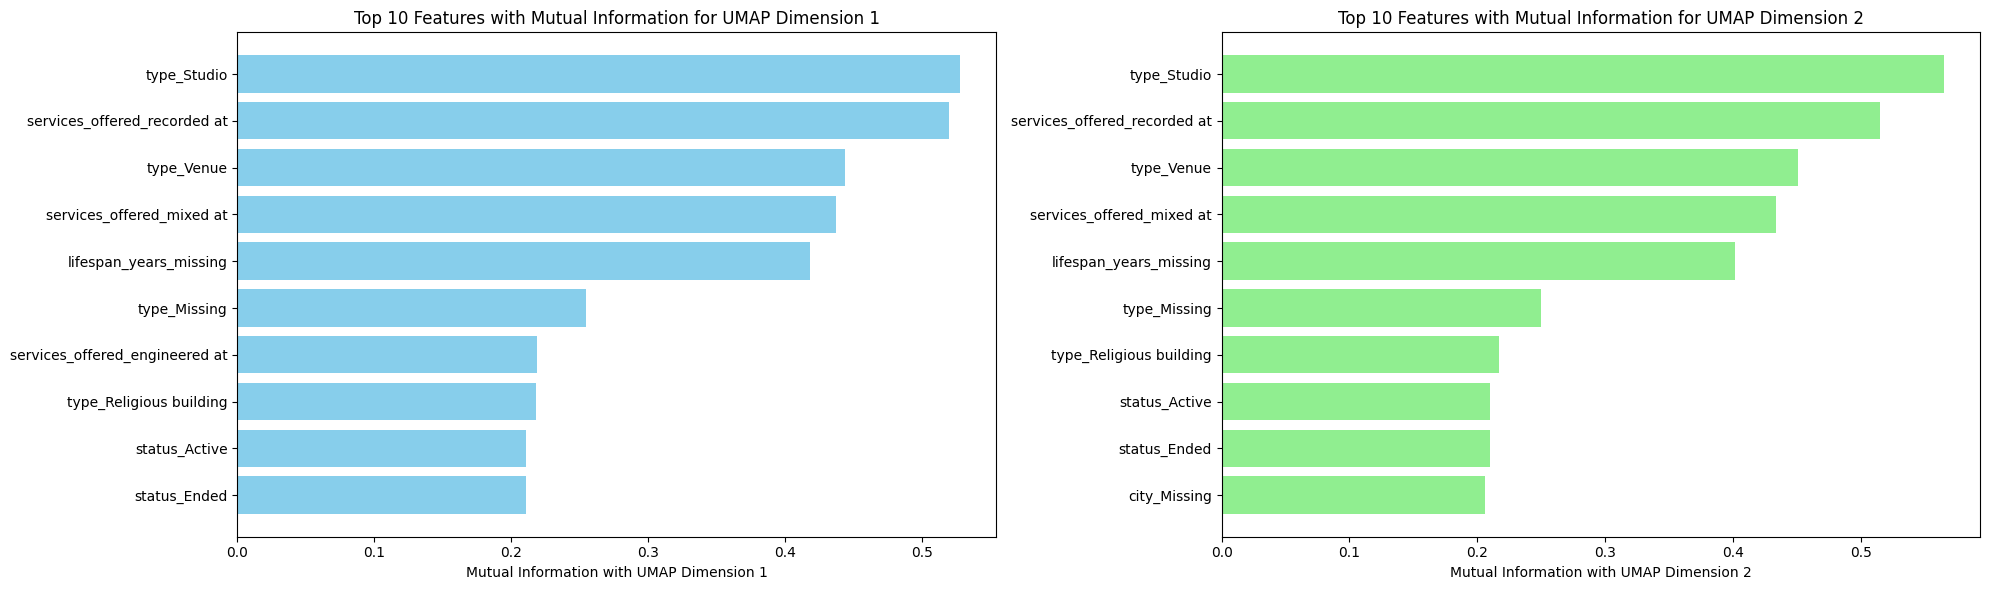

In [9]:
from sklearn.feature_selection import mutual_info_regression

# Analysis for UMAP Dimension 1
mi_dim1 = mutual_info_regression(merged_df_encoded, X_umap[:, 0])
mi_dim1 = list(zip(merged_df_encoded.columns, mi_dim1))

# Sort and look at the highest mutual information scores
sorted_mi_dim1 = sorted(mi_dim1, key=lambda x: x[1], reverse=True)

# Extract the top 10 highest mutual information scores
top_features_dim1 = sorted_mi_dim1[:10]
features_dim1 = [feature for feature, _ in top_features_dim1]
mi_scores_dim1 = [score for _, score in top_features_dim1]

# Analysis for UMAP Dimension 2
mi_dim2 = mutual_info_regression(merged_df_encoded, X_umap[:, 1])
mi_dim2 = list(zip(merged_df_encoded.columns, mi_dim2))

# Sort and look at the highest mutual information scores
sorted_mi_dim2 = sorted(mi_dim2, key=lambda x: x[1], reverse=True)

# Extract the top 10 highest mutual information scores
top_features_dim2 = sorted_mi_dim2[:10]
features_dim2 = [feature for feature, _ in top_features_dim2]
mi_scores_dim2 = [score for _, score in top_features_dim2]

# Plot the bar charts side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Bar chart for Dimension 1
axes[0].barh(features_dim1, mi_scores_dim1, color='skyblue')
axes[0].set_xlabel('Mutual Information with UMAP Dimension 1')
axes[0].set_title('Top 10 Features with Mutual Information for UMAP Dimension 1')
axes[0].invert_yaxis()  # Highest mutual information at the top

# Bar chart for Dimension 2
axes[1].barh(features_dim2, mi_scores_dim2, color='lightgreen')
axes[1].set_xlabel('Mutual Information with UMAP Dimension 2')
axes[1].set_title('Top 10 Features with Mutual Information for UMAP Dimension 2')
axes[1].invert_yaxis()  # Highest mutual information at the top

plt.tight_layout()
plt.show()


The most important features for each UMAP dimension were determined based on feature mutual information with each respective UMAP dimension. Since UMAP is intended to uncover non linear relationships among variables, simply using correlation would have been ineffective.

For  Dimension 1:
    There is moderate mutual information scores (0.3-0.5) for:
        -type_Studio, services_offered_recorded at, type_Venue, services_offered_mixed at, and lifespan_years_missing.
    There is weak mutual information scores (0.1-0.29) for:
        -type_Missing, services_offered_engineered at, type_Religious building, status_Active, and status_Ended.

For Dimension 2:
    There is moderate mutual information scores (0.3-0.5) for:
        -type_Studio, services_offered_recorded at, type_Venue, services_offered_mixed at and lifespan_years_missing.
    There is weak mutual information scores (0.1-0.29) for:
        -type_Missing, type_Religious building, status_Active, status_Ended, and city_Missing.

It is important to notice that the top features for mutual information with each dimension are nearly identical, with the exception of services_offered_engineered at in dimension 1 and city_Missing in dimension 2.

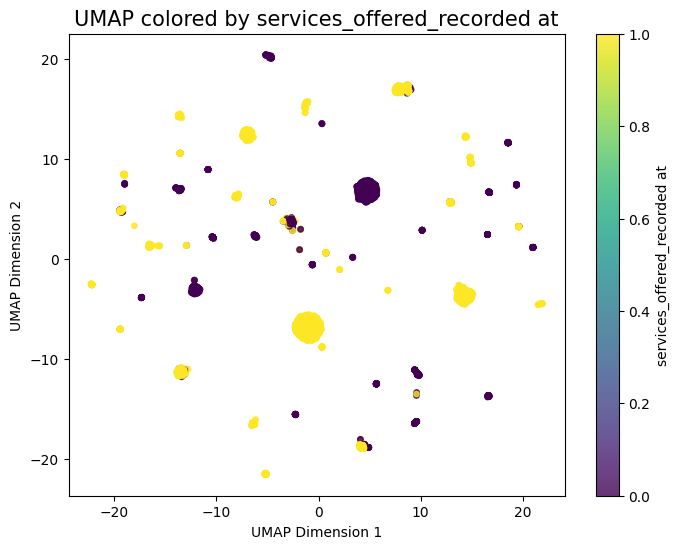

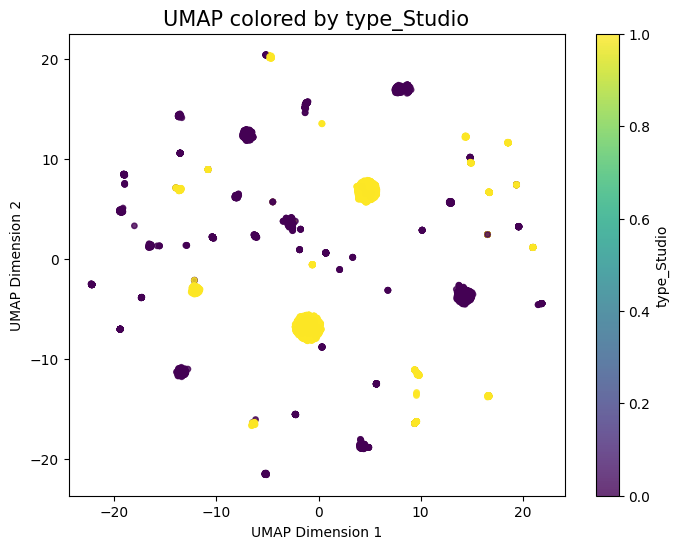

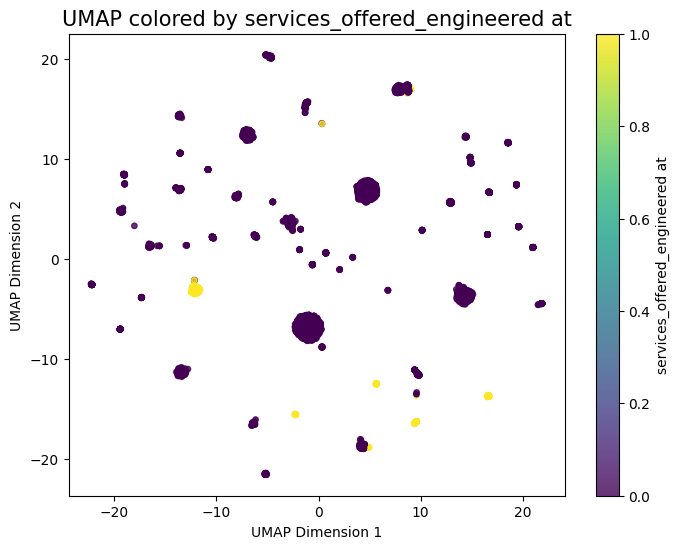

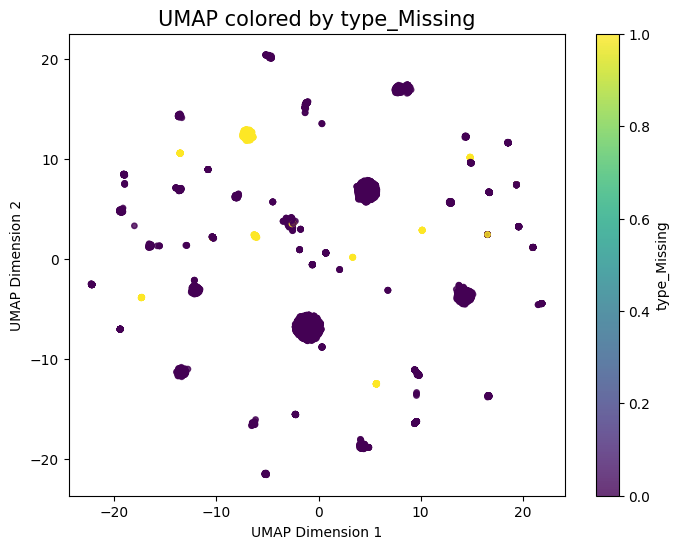

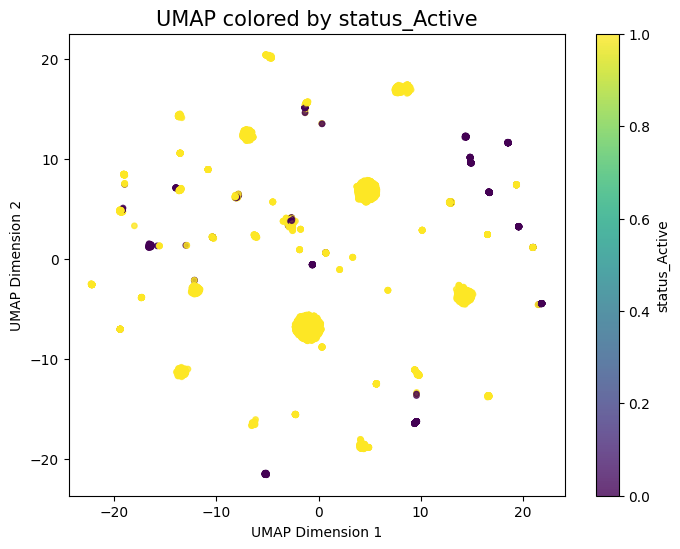

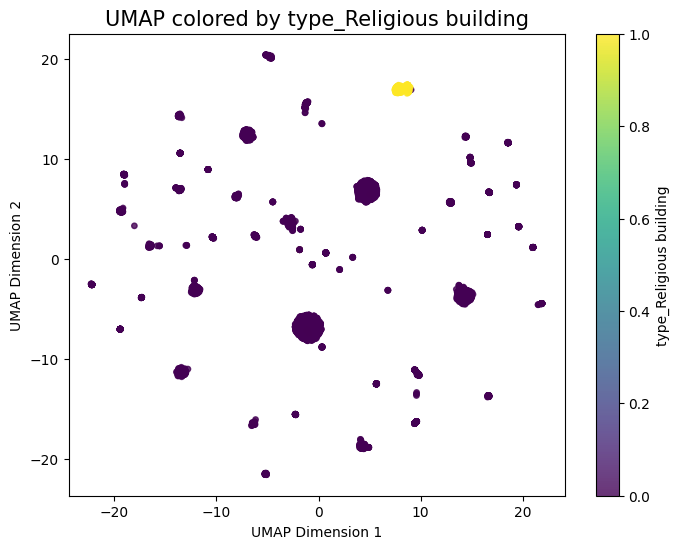

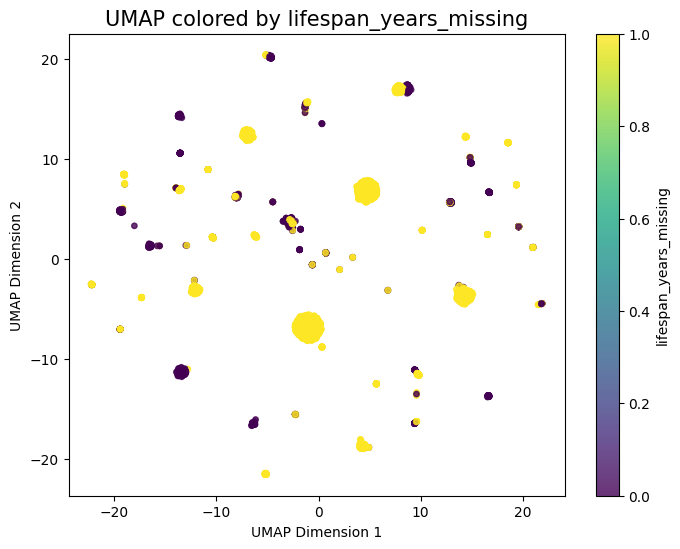

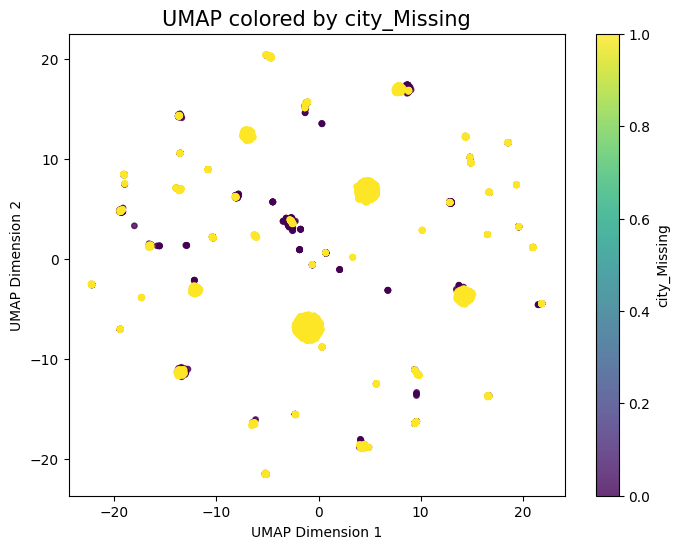

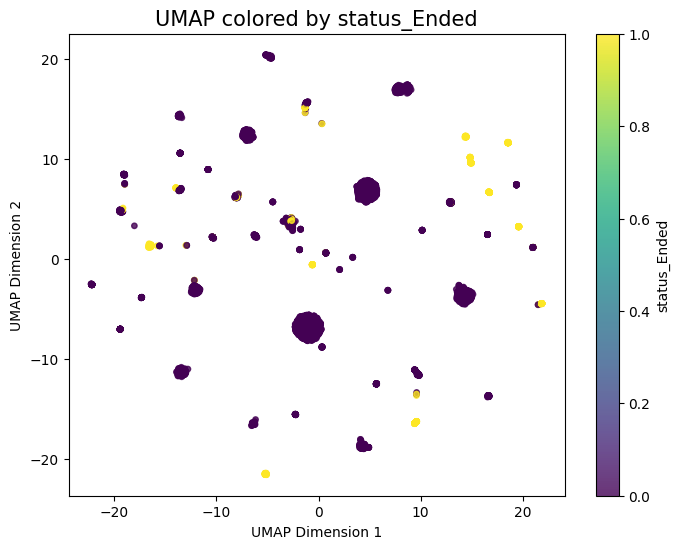

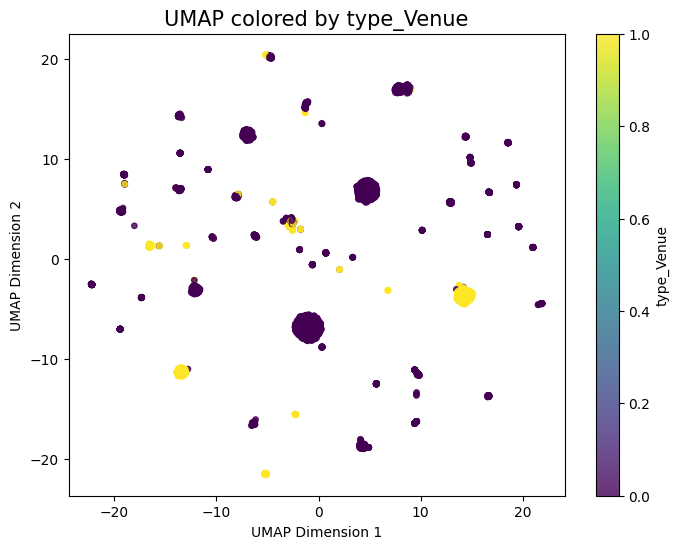

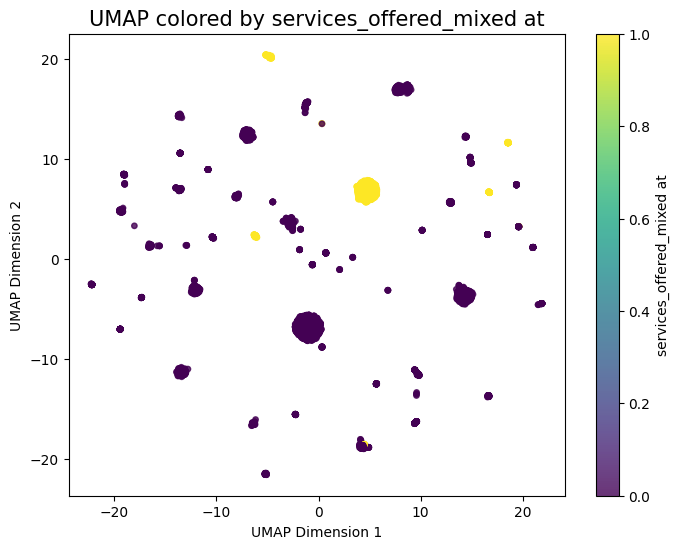

In [10]:

# Combine into one list (or keep them separate if you prefer)
features_to_examine = list(set(features_dim1 + features_dim2))


#Plot each feature in a loop

for feat in features_to_examine:
    if feat not in merged_df_encoded.columns:
        print(f"Warning: {feat} is not a column in merged_df_encoded.")
        continue
    
    plt.figure(figsize=(8, 6))
    plt.scatter(
        X_umap[:, 0],
        X_umap[:, 1],
        c=merged_df_encoded[feat],  # color by feature
        cmap='viridis',            # or another colormap (e.g., 'plasma', 'coolwarm')
        s=15,
        alpha=0.8
    )
    plt.colorbar(label=feat)
    plt.title(f'UMAP colored by {feat}', fontsize=15)
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.show()


Failure Analysis: The most prevalent datapoints occur so frequently, it is difficult to distinguish a pattern. Specifically this is most evident for  services_offered_recorded_at. Since we don't want to ablate too much data, we can begin with this since it is the most prevalent value in the dataset.

In [11]:
ablation_df = merged_df_encoded.query('`services_offered_recorded at` == 0').copy()
ablation_df.shape

(5546, 6045)

This ablation of the recording service results in a very different UMAP embedding.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


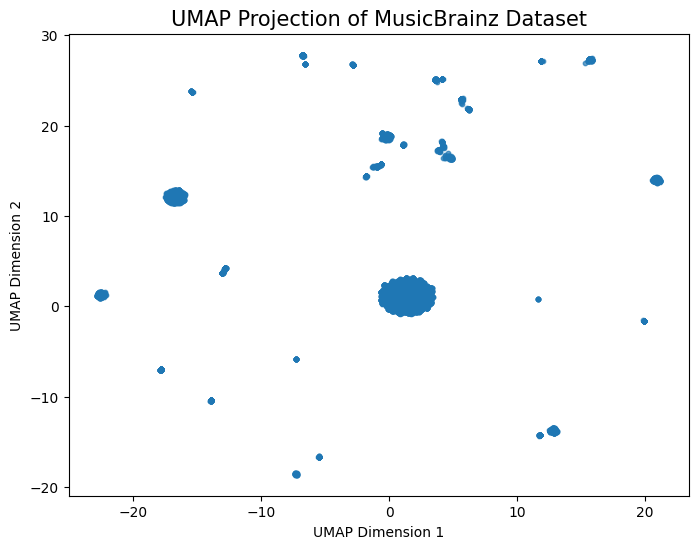

In [12]:
X1 = ablation_df.values  # Convert DataFrame to a NumPy array

# ----------------------------------------------------

X1_scaled = scaler.fit_transform(X1)


# Perform the dimensionality reduction
X_umap1 = reducer.fit_transform(X1_scaled)

# ----------------------------------------------------
# 5. Visualize or further process the results
#    If you just want a quick scatter plot:

plt.figure(figsize=(8, 6))
plt.scatter(X_umap1[:, 0], X_umap1[:, 1], s=10, alpha=0.7)
plt.title('UMAP Projection of MusicBrainz Dataset', fontsize=15)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

The next step is to analyze the feature mutual information for this new UMAP.

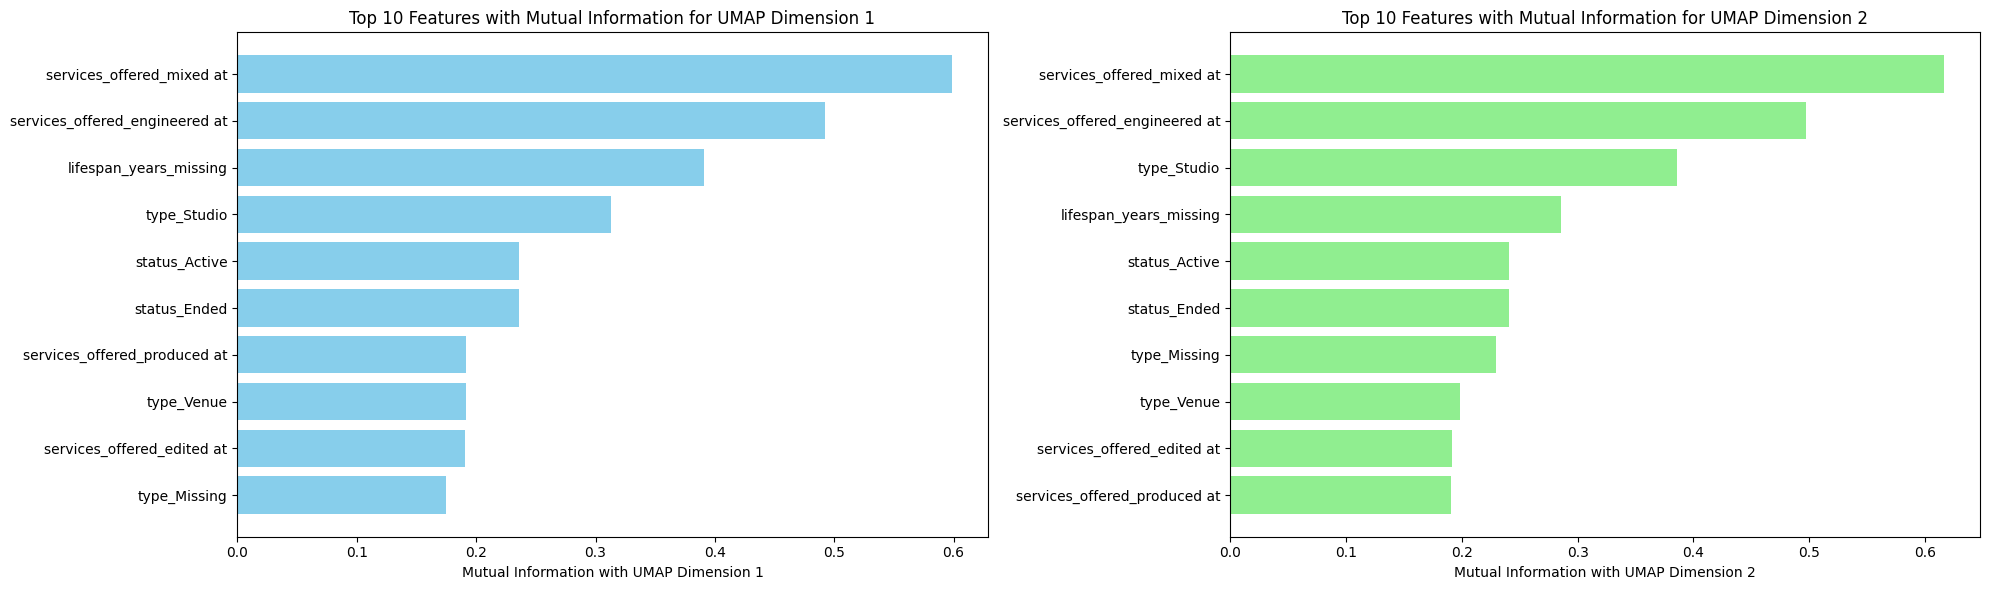

In [20]:
# Analysis for UMAP Dimension 1
mi1_dim1 = mutual_info_regression(ablation_df, X_umap1[:, 0])
mi1_dim1 = list(zip(ablation_df.columns, mi1_dim1))

# Sort and look at the highest mutual information scores
sorted_mi1_dim1 = sorted(mi1_dim1, key=lambda x: x[1], reverse=True)

# Extract the top 10 highest mutual information scores
top_features1_dim1 = sorted_mi1_dim1[:10]
features1_dim1 = [feature for feature, _ in top_features1_dim1]
mi_scores1_dim1 = [score for _, score in top_features1_dim1]

# Analysis for UMAP Dimension 2
mi1_dim2 = mutual_info_regression(ablation_df, X_umap1[:, 1])
mi1_dim2 = list(zip(ablation_df.columns, mi1_dim2))

# Sort and look at the highest mutual information scores
sorted_mi1_dim2 = sorted(mi1_dim2, key=lambda x: x[1], reverse=True)

# Extract the top 10 highest mutual information scores
top_features1_dim2 = sorted_mi1_dim2[:10]
features1_dim2 = [feature for feature, _ in top_features1_dim2]
mi_scores1_dim2 = [score for _, score in top_features1_dim2]

# Plot the bar charts side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Bar chart for Dimension 1
axes[0].barh(features1_dim1, mi_scores1_dim1, color='skyblue')
axes[0].set_xlabel('Mutual Information with UMAP Dimension 1')
axes[0].set_title('Top 10 Features with Mutual Information for UMAP Dimension 1')
axes[0].invert_yaxis()  # Highest mutual information at the top

# Bar chart for Dimension 2
axes[1].barh(features1_dim2, mi_scores1_dim2, color='lightgreen')
axes[1].set_xlabel('Mutual Information with UMAP Dimension 2')
axes[1].set_title('Top 10 Features with Mutual Information for UMAP Dimension 2')
axes[1].invert_yaxis()  # Highest mutual information at the top

plt.tight_layout()
plt.show()

Although they are ordered differently, it is worth noting that after ablating the most prevalent feature, services_offered_recorded at, the top ten features for dimensions one and two are now the same.

After evaluating the trustworthiness of both representations, we can observe an improvement of about 2%. However with that being said, over 2/3 of the dataset was ablated to accomplish this.

In [21]:
from sklearn.manifold import trustworthiness

# Calculate trustworthiness for the original UMAP embedding
trustworthiness_score = trustworthiness(X_scaled, X_umap, n_neighbors=15)
print(f"Trustworthiness of the original UMAP embedding: {trustworthiness_score:.4f}")

# Calculate trustworthiness for the ablated UMAP embedding
trustworthiness_score1 = trustworthiness(X1_scaled, X_umap1, n_neighbors=15)
print(f"Trustworthiness of the ablated UMAP embedding: {trustworthiness_score1:.4f}")

Trustworthiness of the original UMAP embedding: 0.6679
Trustworthiness of the ablated UMAP embedding: 0.6856


Hyperparameter Sensitivity Analysis: The ablation of the highest magnitude feature (services_offered_recording at) resulted in an improved UMAP trustworthiness score, this is an indication that the current metric (Euclidean Distance) performs poorly on this feature vector with the highest magnitude. Since this observation is in alignment with the limitations of Euclidean Distance, it should be insightful to test the Cosine Similarity metric as this should be more effective at comparing vectors of varying magnitudes, especially for extreme cases like services_offered_recording at.

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


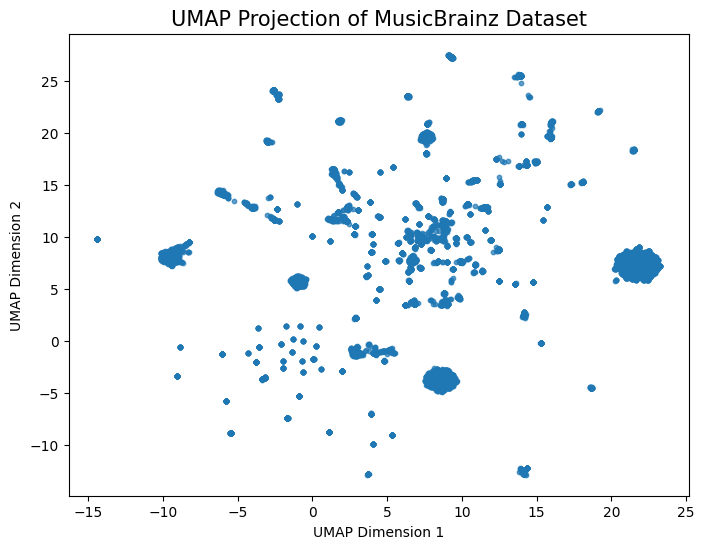

In [22]:
reducer2 = umap.UMAP(
    n_neighbors=15,   # typical default, can tune
    n_components=2,   # 2D for visualization
    min_dist=0.1,     # controls how tightly points are clustered
    metric='cosine',
    random_state=42    # for reproducibility
)

# Perform the dimensionality reduction
X2_umap = reducer2.fit_transform(X_scaled)

# ----------------------------------------------------
# Visualize or further process the results
#    If you just want a quick scatter plot:

plt.figure(figsize=(8, 6))
plt.scatter(X2_umap[:, 0], X2_umap[:, 1], s=10, alpha=0.7)
plt.title('UMAP Projection of MusicBrainz Dataset', fontsize=15)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()
# you can use for clustering, further visualization, etc.

We can see that Trustworthiness score with the Cosine Similarity metric is higher than all other tests.

In [23]:

print(f"Trustworthiness of the original UMAP embedding with Euclidean metric: {trustworthiness_score:.4f}")
print(f"Trustworthiness of the ablated UMAP embedding with Euclidean metric:{trustworthiness_score1:.4f}")

# Calculate trustworthiness for the ablated UMAP embedding
trustworthiness_score2 = trustworthiness(X_scaled, X2_umap, n_neighbors=15)
print(f"Trustworthiness of UMAP embedding with Cosine metric: {trustworthiness_score2:.4f}")

Trustworthiness of the original UMAP embedding with Euclidean metric: 0.6679
Trustworthiness of the ablated UMAP embedding with Euclidean metric:0.6856
Trustworthiness of UMAP embedding with Cosine metric: 0.6912


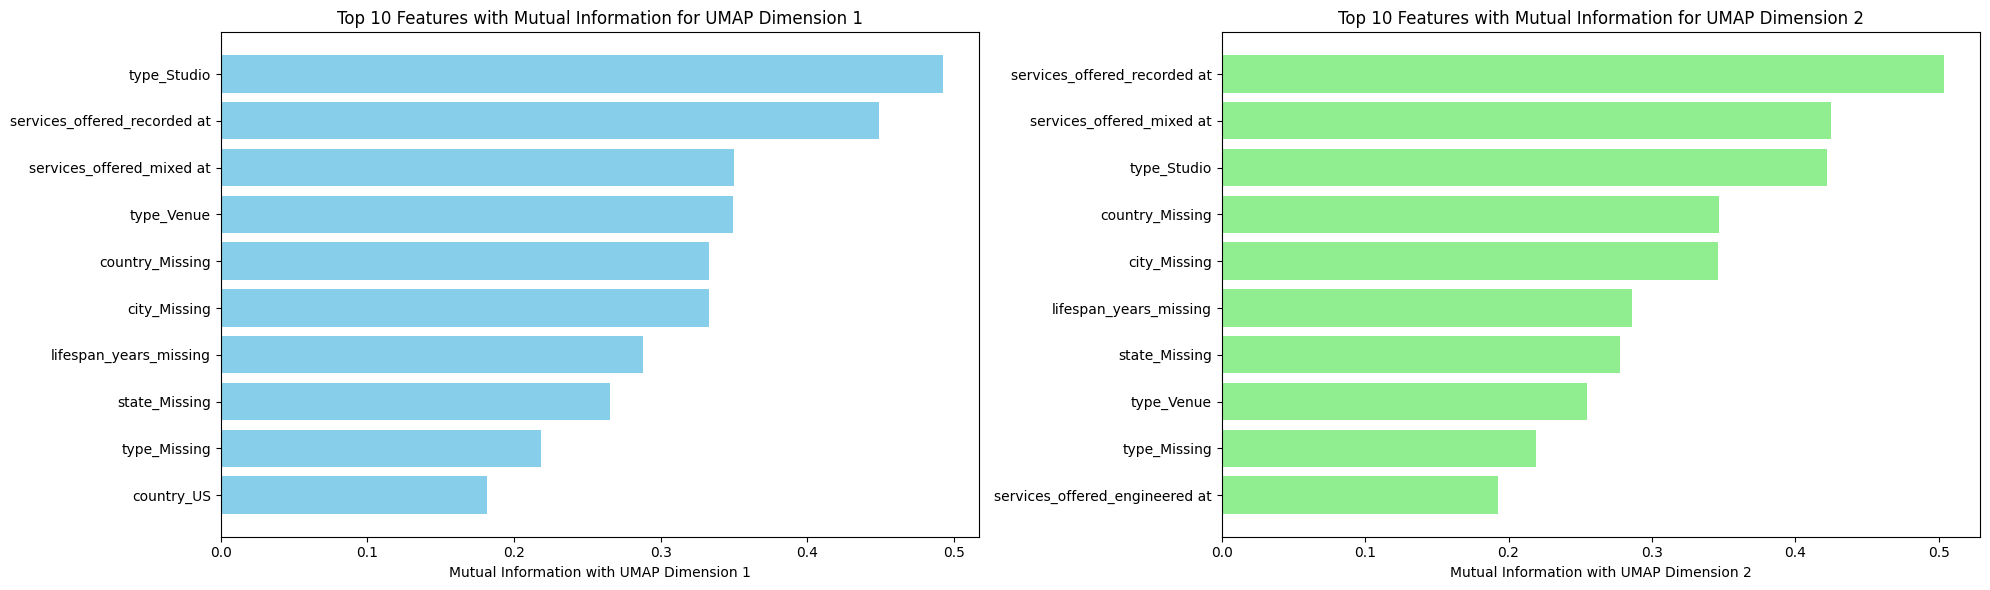

In [24]:


# Analysis for UMAP Dimension 1
mi_dim1c = mutual_info_regression(merged_df_encoded, X2_umap[:, 0])
mi_dim1c = list(zip(merged_df_encoded.columns, mi_dim1c))

# Sort and look at the highest mutual information scores
sorted_mi_dim1c = sorted(mi_dim1c, key=lambda x: x[1], reverse=True)

# Extract the top 10 highest mutual information scores
top_features_dim1c = sorted_mi_dim1c[:10]
features_dim1c = [feature for feature, _ in top_features_dim1c]
mi_scores_dim1c = [score for _, score in top_features_dim1c]

# Analysis for UMAP Dimension 2
mi_dim2c = mutual_info_regression(merged_df_encoded, X2_umap[:, 1])
mi_dim2c = list(zip(merged_df_encoded.columns, mi_dim2c))

# Sort and look at the highest mutual information scores
sorted_mi_dim2c = sorted(mi_dim2c, key=lambda x: x[1], reverse=True)

# Extract the top 10 highest mutual information scores
top_features_dim2c = sorted_mi_dim2c[:10]
features_dim2c = [feature for feature, _ in top_features_dim2c]
mi_scores_dim2c = [score for _, score in top_features_dim2c]

# Plot the bar charts side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

# Bar chart for Dimension 1
axes[0].barh(features_dim1c, mi_scores_dim1c, color='skyblue')
axes[0].set_xlabel('Mutual Information with UMAP Dimension 1')
axes[0].set_title('Top 10 Features with Mutual Information for UMAP Dimension 1')
axes[0].invert_yaxis()  # Highest mutual information at the top

# Bar chart for Dimension 2
axes[1].barh(features_dim2c, mi_scores_dim2c, color='lightgreen')
axes[1].set_xlabel('Mutual Information with UMAP Dimension 2')
axes[1].set_title('Top 10 Features with Mutual Information for UMAP Dimension 2')
axes[1].invert_yaxis()  # Highest mutual information at the top

plt.tight_layout()
plt.show()


Comparing these new feature importances to the original, we can observe many of the same values but with very different mutual information scores. This updated approach includes missing Country and State variables as top features along with country_US in dimension 1.

Given this updated approach has a higher trustworthiness score and prioritizes geographic variables (especially missing ones), it would be prudent to find a solution to reduce the prevalence of missing geographic variables.

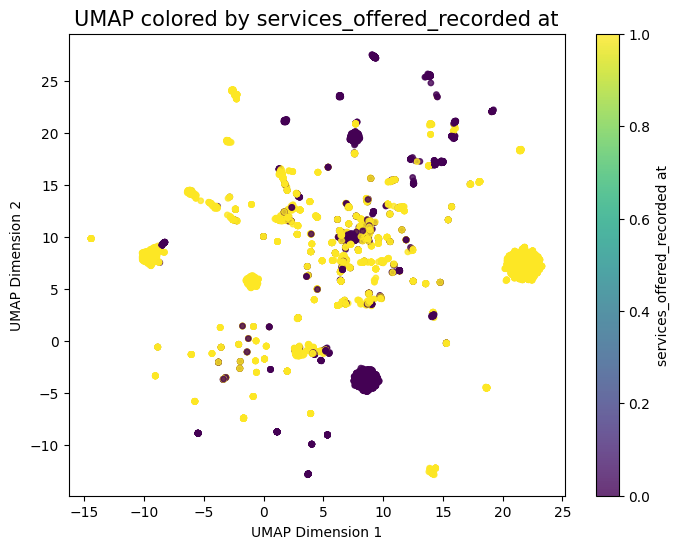

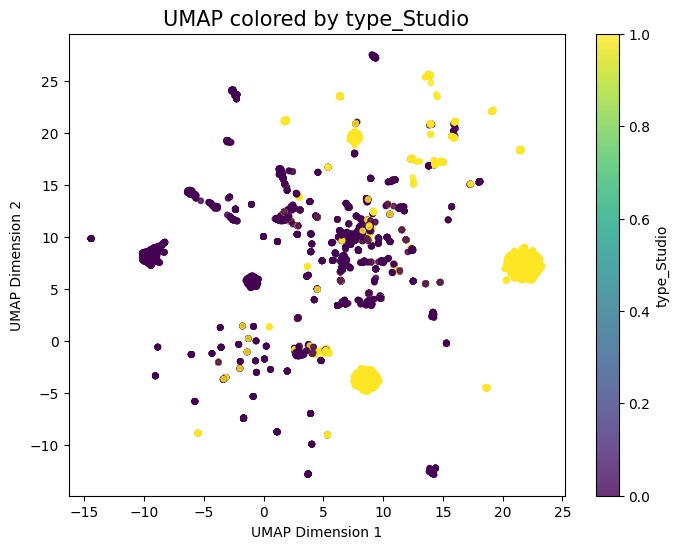

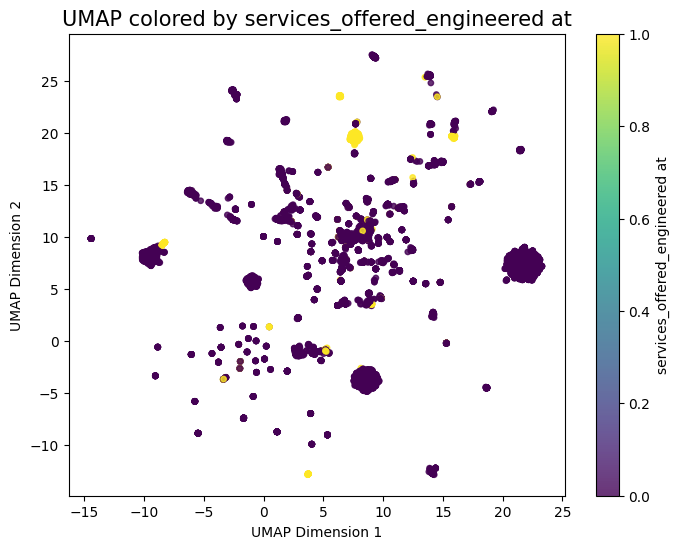

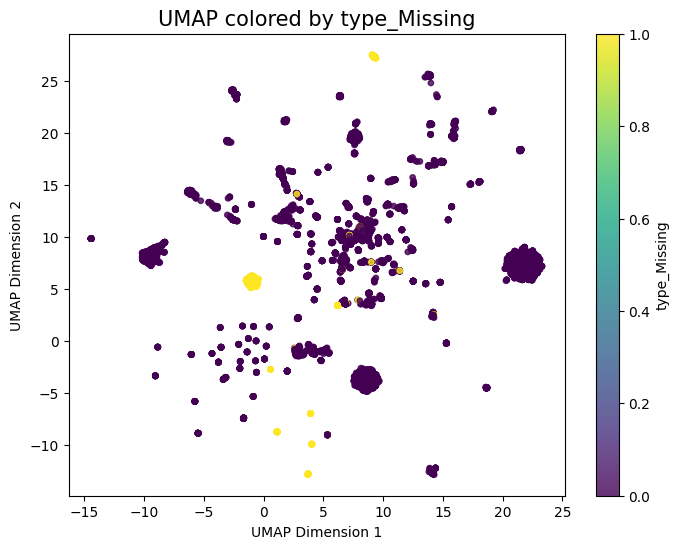

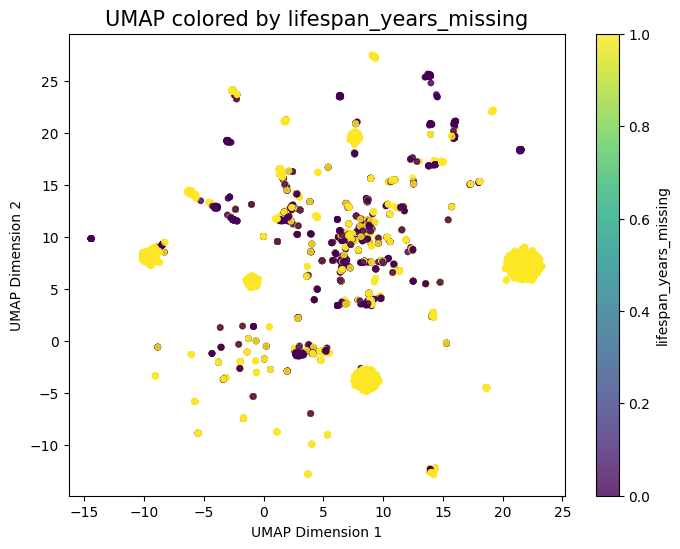

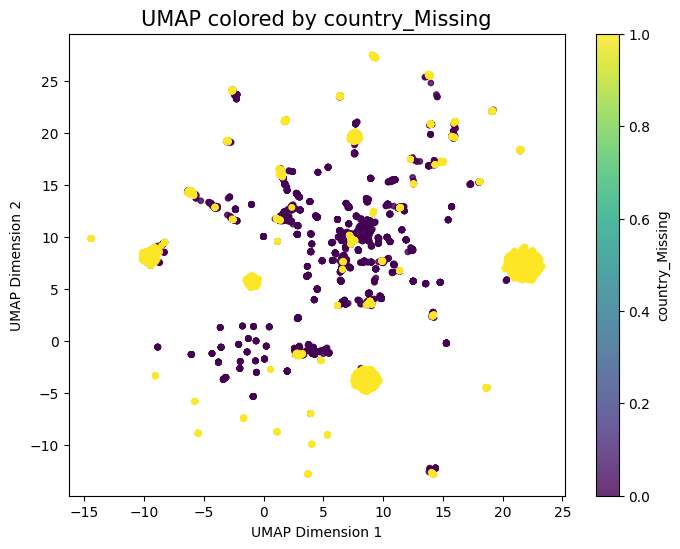

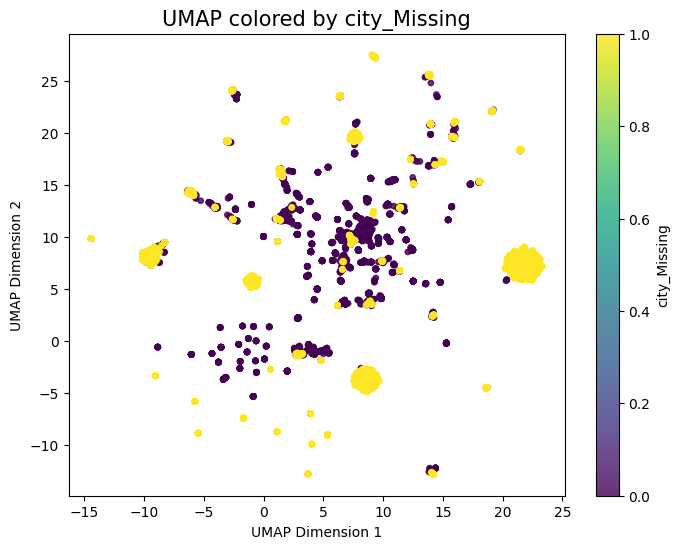

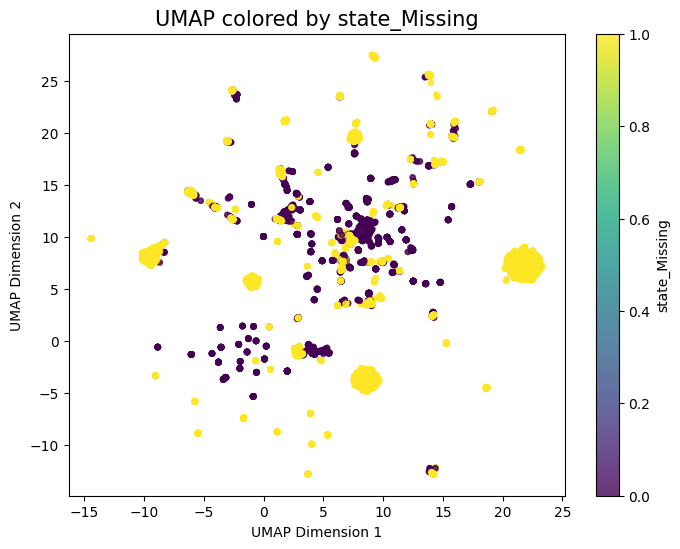

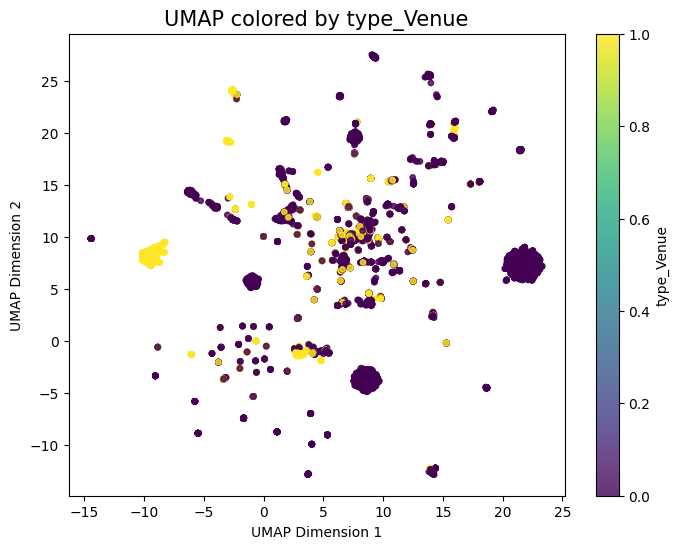

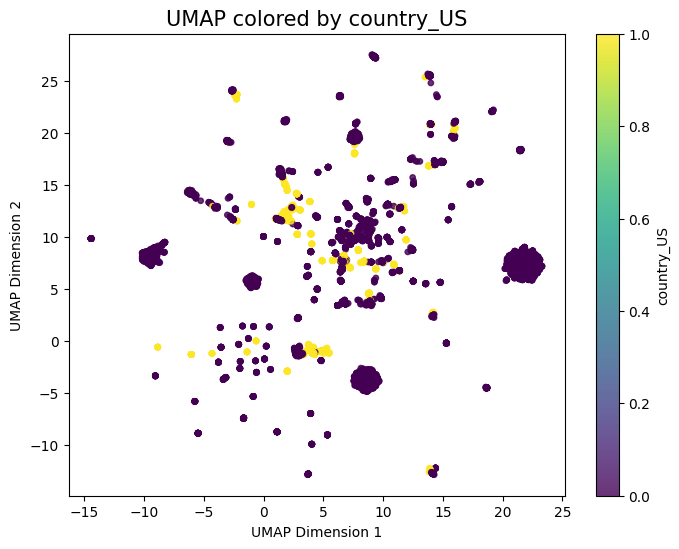

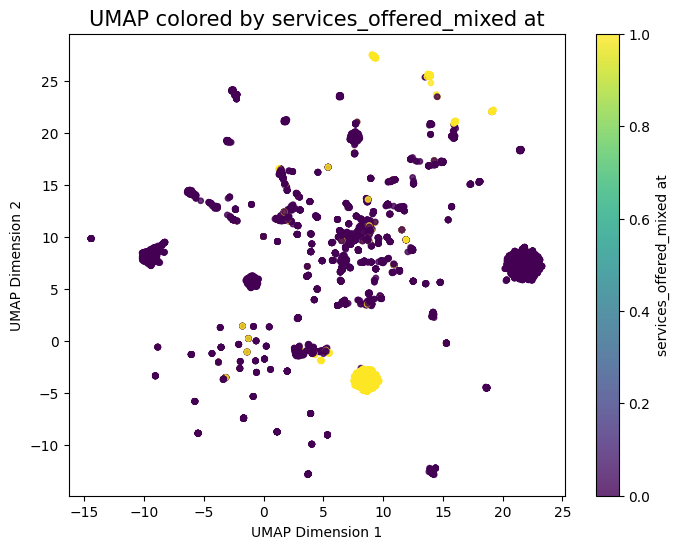

In [26]:


# Combine into one list (or keep them separate if you prefer)
features_to_examine1 = list(set(features_dim1c + features_dim2c))


#Plot each feature in a loop

for feat in features_to_examine1:
    if feat not in merged_df_encoded.columns:
        print(f"Warning: {feat} is not a column in merged_df_encoded.")
        continue
    
    plt.figure(figsize=(8, 6))
    plt.scatter(
        X2_umap[:, 0],
        X2_umap[:, 1],
        c=merged_df_encoded[feat],  # color by feature
        cmap='viridis',            # or another colormap (e.g., 'plasma', 'coolwarm')
        s=15,
        alpha=0.8
    )
    plt.colorbar(label=feat)
    plt.title(f'UMAP colored by {feat}', fontsize=15)
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.show()

Although the missing geographic variables still present an issue, we can see tighter grouping for the the higher magnitude features (type_Studio and services_offered_recording at). Clearly Cosine Similarity is a better optimization metric for this use case. With that being said, addressing the missing geographic variables would likely improve performance.